# `**IMAGE CAPTIONING SYSTEM USING PYTORCH AND TRANSFORMERS**`

# ***GROUP-14***

In [2]:
import urllib.parse as parse
import os
from PIL import Image
import requests
import requests
import torch
from PIL import Image
from transformers import *
from tqdm import tqdm
import evaluate

device = "cuda" if torch.cuda.is_available() else "cpu"

/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


# Using a Pre-Trained Model

In [4]:
# load a fine-tuned image captioning model and corresponding tokenizer and image processor
finetuned_model_decoder = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
finetuned_tokenizer_gpt2 = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
finetuned_image_processor_vit = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/config.json
Model config VisionEncoderDecoderConfig {
  "_name_or_path": "vit-gpt-pt",
  "architectures": [
    "VisionEncoderDecoderModel"
  ],
  "bos_token_id": 50256,
  "decoder": {
    "_name_or_path": "",
    "activation_function": "gelu_new",
    "add_cross_attention": true,
    "architectures": [
      "GPT2LMHeadModel"
    ],
    "attn_pdrop": 0.1,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 50256,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": 50256,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "early_stopping": false,
    "embd_pdrop": 0.1,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 50256,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "forced_bo

In [5]:


# Function to determine whether a string is a URL or not
def is_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# Function to load an image from a URL or a local path
def load_image(image_path):
    if is_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)
    else:
        raise ValueError("The provided path does not exist and is not a valid URL.")

# Function to perform inference to get a caption for an image
def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)
    # Preprocess the image
    img = image_processor(image, return_tensors="pt").to(device)
    # Generate the caption using greedy decoding
    output = model.generate(**img)
    # Decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption


Saving 360_F_311679352_jn4EBqQ2CA4ch3vYbAdql5vgMfa6lpOL.jpg to 360_F_311679352_jn4EBqQ2CA4ch3vYbAdql5vgMfa6lpOL.jpg


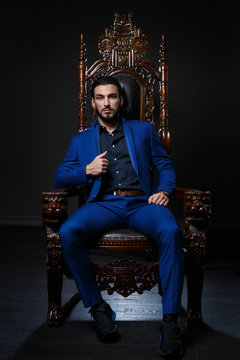

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Generated Caption: a man in a suit sitting on a chair 


In [6]:
# Load necessary modules for displaying and uploading in Google Colab
from IPython.display import display
from google.colab import files

# Prompt user to upload an image file
uploaded = files.upload()
image_path = next(iter(uploaded))  # Get the path of the uploaded file

# Display the uploaded image
image = load_image(image_path)
display(image)

# Assuming `finetuned_model`, `finetuned_image_processor`, and `finetuned_tokenizer` are already defined
caption = get_caption(finetuned_model_decoder, finetuned_image_processor_vit, finetuned_tokenizer_gpt2, image_path)
print("Generated Caption:", caption)

Saving elephant-eating.jpg to elephant-eating (2).jpg


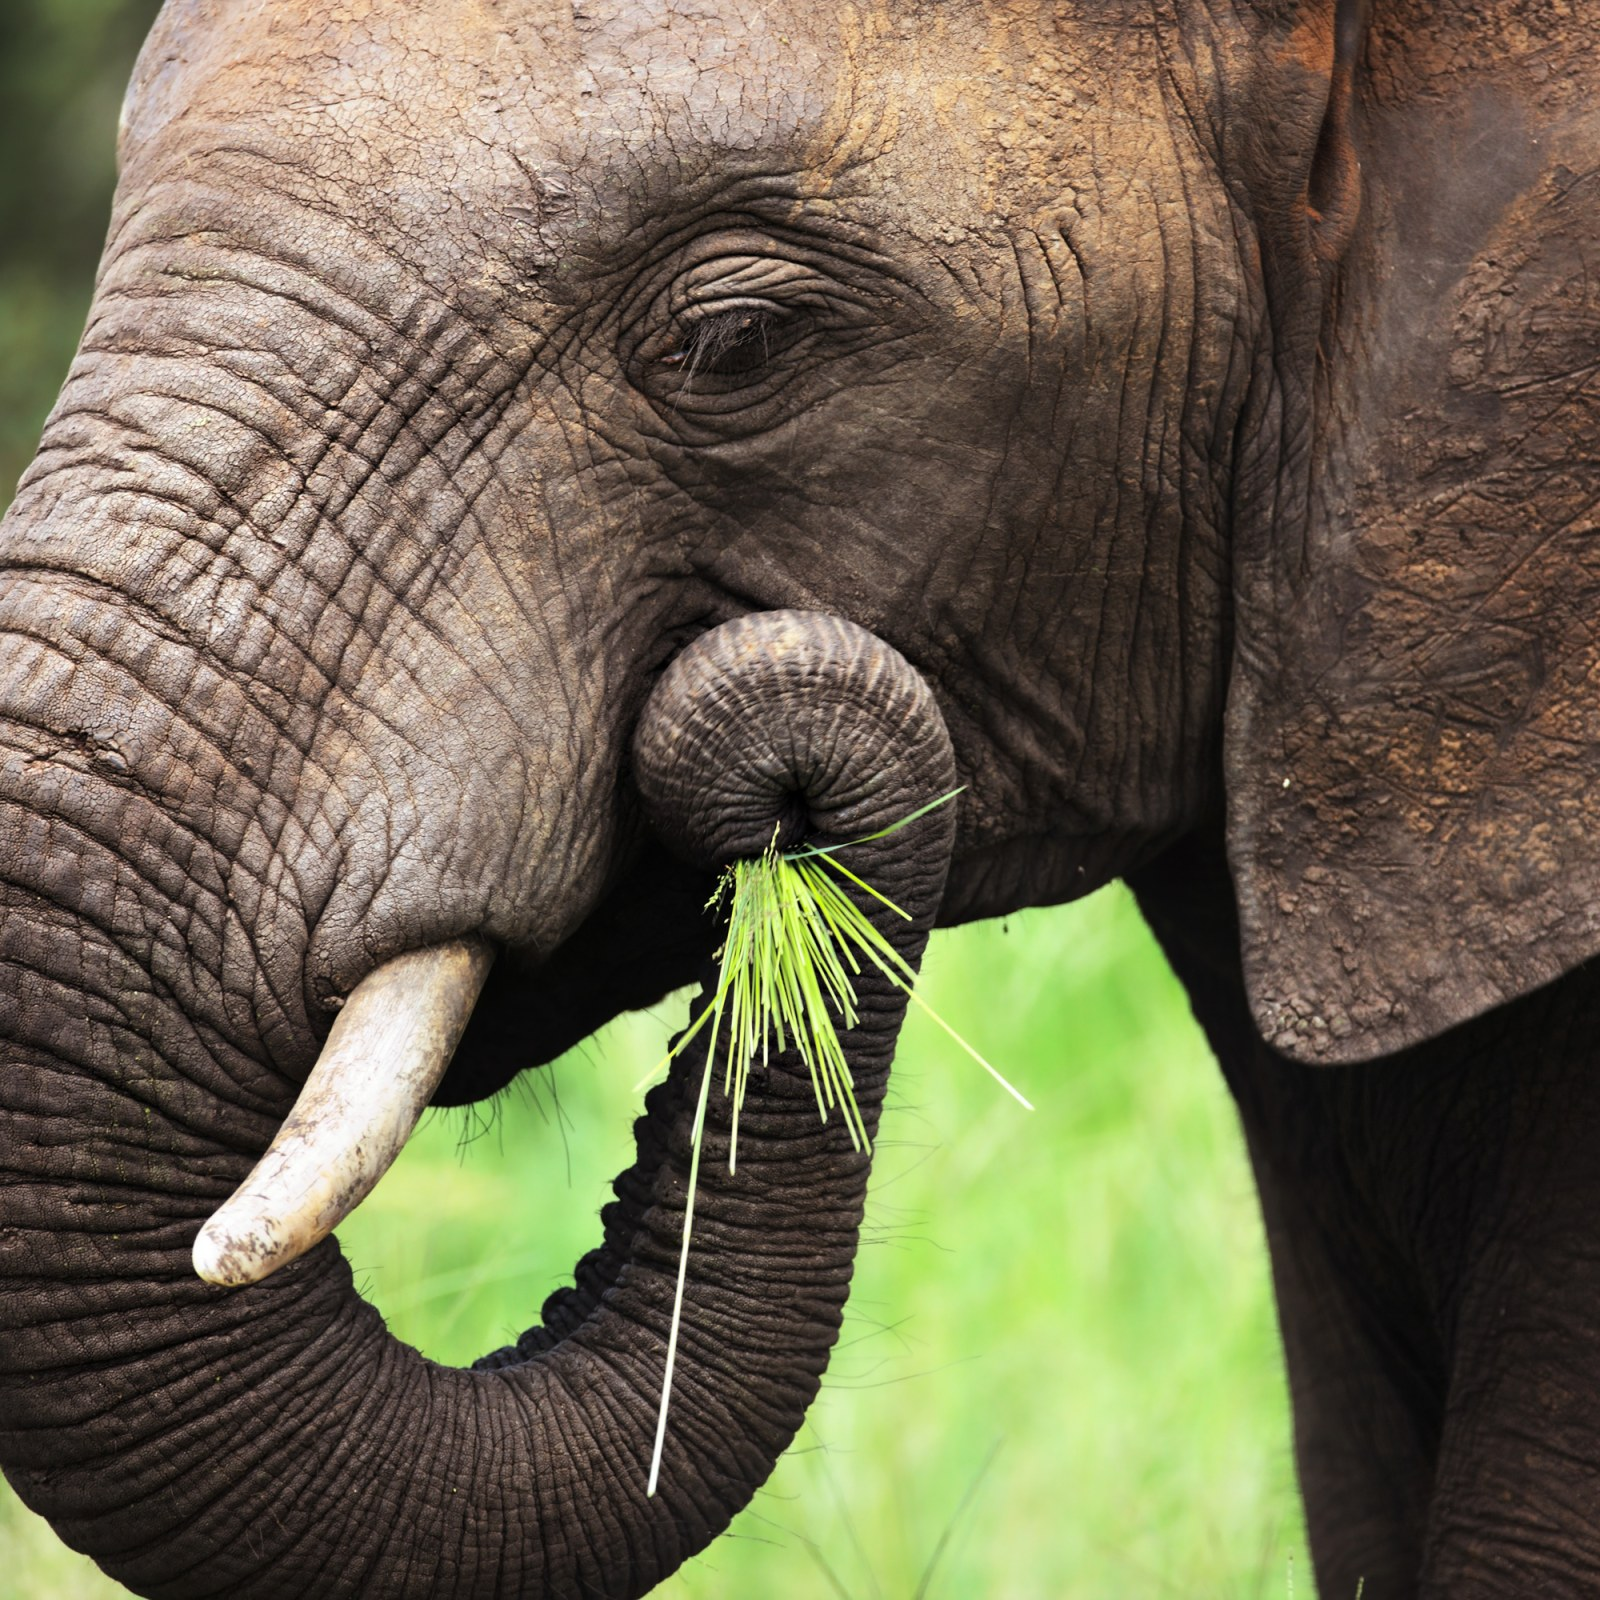

Generated Caption: an elephant with a large tusk eating grass 


In [10]:
# Load necessary modules for displaying and uploading in Google Colab
from IPython.display import display
from google.colab import files

# Prompt user to upload an image file
uploaded = files.upload()
image_path = next(iter(uploaded))  # Get the path of the uploaded file
display(image)

# Display the uploaded image
image = load_image(image_path)
caption = get_caption(finetuned_model_decoder, finetuned_image_processor_vit, finetuned_tokenizer_gpt2, image_path)
print("Generated Caption:", caption)

Now Traning with our datasets

## Loading the Model

In [ ]:
# Define the device to use (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the encoder and decoder models
encoder_model_name = "microsoft/swin-base-patch4-window7-224-in22k"
decoder_model_name = "gpt2"
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    encoder_model_name, decoder_model_name
).to(device)

In [ ]:

tokenizer = GPT2TokenizerFast.from_pretrained(decoder_model_name)

image_processor = ViTImageProcessor.from_pretrained(encoder_model_name)

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/merges.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_ran

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--microsoft--swin-base-patch4-window7-224-in22k/snapshots/790d9b6014f6d157cc34d70afc0604eccc92dadd/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'shortest_edge', 'longest_edge'}), got 224. Converted to {'height': 224, 'width': 224}.
Image processor ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [ ]:
# Configurations for different decoder types
if "gpt2" in decoder_model_name:
    # GPT-2 specific configurations
    tokenizer.pad_token = tokenizer.eos_token
    model.config.eos_token_id = tokenizer.eos_token_id
    model.config.pad_token_id = tokenizer.eos_token_id
    model.config.decoder_start_token_id = tokenizer.bos_token_id
else:
    # Default configurations for other models
    model.config.decoder_start_token_id = tokenizer.cls_token_id if hasattr(tokenizer, 'cls_token_id') else tokenizer.bos_token_id
    model.config.pad_token_id = tokenizer.pad_token_id

# Function to load an image from a URL or local path
def load_image(image_path):
    if image_path.startswith("http://") or image_path.startswith("https://"):
        response = requests.get(image_path)
        image = Image.open(response.raw)
    else:
        image = Image.open(image_path)
    return image.convert("RGB")

In [ ]:
from datasets import load_dataset

# Define maximum caption length in tokens
caption_max_length = 32

dataset_sample_ratio = 5  # This will use 2% of the dataset becuase of

train_dataset = load_dataset("HuggingFaceM4/COCO", split=f"train[:{dataset_sample_ratio}%]")
validation_dataset = load_dataset("HuggingFaceM4/COCO", split=f"validation[:{dataset_sample_ratio}%]")
test_dataset = load_dataset("HuggingFaceM4/COCO", split="test")

len(train_dataset), len(validation_dataset), len(test_dataset)


Computing checksums:  50%|#####     | 1/2 [01:16<01:16, 76.07s/it]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset coco downloaded and prepared to /root/.cache/huggingface/datasets/HuggingFaceM4___coco/2014/1.0.0/7dba4b1d9b12e588770263b87c2a1fd7b03072c0a0cf550c896dbd09bf2bb7f8. Subsequent calls will reuse this data.


(283374, 12505, 25010)

## Preprocessing the Inputs

In [ ]:
# Define a function to check if an image is in color (RGB or RGBA)
def is_color_image(item):
    image_dimensions = np.array(item["image"]).ndim
    return image_dimensions in [3, 4]

# Apply the filter to each dataset to exclude grayscale images
color_train_dataset = train_dataset.filter(is_color_image, num_proc=2)
color_validation_dataset = validation_dataset.filter(is_color_image, num_proc=2)
color_test_dataset = test_dataset.filter(is_color_image, num_proc=2)

#1:   0%|          | 0/142 [00:00<?, ?ba/s]

#0:   0%|          | 0/142 [00:00<?, ?ba/s]

#1:   0%|          | 0/7 [00:00<?, ?ba/s]

#0:   0%|          | 0/7 [00:00<?, ?ba/s]

#0:   0%|          | 0/13 [00:00<?, ?ba/s]

#1:   0%|          | 0/13 [00:00<?, ?ba/s]

In [ ]:
def preprocess_images_and_captions(items):
    """Preprocess the dataset items by processing images and tokenizing captions."""
    # Process the image using the image processor and move to the appropriate device
    pixel_values = image_processor(items["image"], return_tensors="pt").pixel_values.to(device)

    # Tokenize captions with truncation and padding to a fixed max length, and move to the appropriate device
    captions = [sentence["raw"] for sentence in items["sentences"]]
    tokenized_captions = tokenizer(captions,
                                   max_length=caption_max_length,
                                   padding="max_length",
                                   truncation=True,
                                   return_tensors="pt").to(device)

    return {'pixel_values': pixel_values, 'labels': tokenized_captions["input_ids"]}

# Preprocess datasets with the defined function for enhanced clarity during training and evaluation
preprocessed_train_dataset = train_dataset.with_transform(preprocess_images_and_captions)
preprocessed_validation_dataset = validation_dataset.with_transform(preprocess_images_and_captions)
preprocessed_test_dataset = test_dataset.with_transform(preprocess_images_and_captions)


In [ ]:

def collate_samples(batch):
    """Collate function to combine a list of samples into a batch.

    This function takes a batch of samples where each sample is a dictionary containing 'pixel_values' and 'labels'.
    It returns a dictionary with 'pixel_values' and 'labels' combined into tensors, allowing batch processing in models.

    Args:
        batch (list of dicts): The batch to collate, with each dict having 'pixel_values' and 'labels'.

    Returns:
        dict: A dictionary with keys 'pixel_values' and 'labels', each containing a stacked tensor of the batch data.
    """
    # Stack pixel values and labels from the batch into tensors
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = torch.stack([item['labels'] for item in batch])

    return {
        'pixel_values': pixel_values,
        'labels': labels
    }


## Evaluation Metrics

In [ ]:

# load the rouge and bleu metrics
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

def compute_metrics(eval_pred):
  preds = eval_pred.label_ids
  labels = eval_pred.predictions
  # decode the predictions and labels
  pred_str = tokenizer.batch_decode(preds, skip_special_tokens=True)
  labels_str = tokenizer.batch_decode(labels, skip_special_tokens=True)
  # compute the rouge score
  rouge_result = rouge.compute(predictions=pred_str, references=labels_str)
  # multiply by 100 to get the same scale as the rouge score
  rouge_result = {k: round(v * 100, 4) for k, v in rouge_result.items()}
  # compute the bleu score
  bleu_result = bleu.compute(predictions=pred_str, references=labels_str)
  # get the length of the generated captions
  generation_length = bleu_result["translation_length"]
  return {
        **rouge_result,
        "bleu": round(bleu_result["bleu"] * 100, 4),
        "gen_len": bleu_result["translation_length"] / len(preds)
  }

## Training

In [ ]:
# Training configuration
num_epochs = 5  # Number of full passes through the training dataset
batch_size = 8  # Number of samples in each batch to be processed before the model is updated


In [ ]:
# Check the shape of data in the first batch from the training dataset
if len(train_dataset) > 0:  # Ensure the dataset is not empty
    first_item = next(iter(train_dataset))  # Retrieve the first item
    label_shape = first_item["labels"].shape
    pixel_values_shape = first_item["pixel_values"].shape

    # Print the shapes of labels and pixel values
    print("Shape of labels:", label_shape)
    print("Shape of pixel values:", pixel_values_shape)
else:
    print("The dataset is empty.")


torch.Size([32])
torch.Size([3, 224, 224])


### Using the Trainer Class

In [ ]:
# define the training arguments
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,             # use generate to calculate the loss
    num_train_epochs=num_epochs,            # number of epochs
    evaluation_strategy="steps",            # evaluate after each eval_steps
    eval_steps=2000,                        # evaluate after each 2000 steps
    logging_steps=2000,                     # log after each 2000 steps
    save_steps=2000,                        # save after each 2000 steps
    per_device_train_batch_size=batch_size, # batch size for training
    per_device_eval_batch_size=batch_size,  # batch size for evaluation
    output_dir="vit-swin-base-224-gpt2-image-captioning", # output directory
    # push_to_hub=True # whether you want to push the model to the hub,
    # check this guide for more details: https://huggingface.co/transformers/model_sharing.html
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
from transformers import Seq2SeqTrainingArguments

# Training configuration parameters
num_epochs = 5  # Number of full passes through the training dataset
batch_size = 8  # Number of samples per batch

# Define the training arguments for the Seq2Seq model
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,  # Use model's generate method to calculate the loss
    num_train_epochs=num_epochs,  # Set the number of training epochs
    evaluation_strategy="steps",  # Evaluate periodically at a specified number of steps
    eval_steps=2000,  # Steps after which to perform evaluation during training
    logging_steps=2000,  # Steps after which to log training information
    save_steps=2000,  # Steps after which to save the model
    per_device_train_batch_size=batch_size,  # Batch size for training
    per_device_eval_batch_size=batch_size,  # Batch size for evaluation
    output_dir="vit-swin-base-224-gpt2-image-captioning",  # Directory to save model outputs
    push_to_hub=False,  # Optionally set to True to push the model to Hugging Face's Model Hub
    load_best_model_at_end=True,  # Load the best model at the end of training based on metrics
    metric_for_best_model="loss",  # Metric to use to determine the best model
    greater_is_better=False  # Set to False because lower loss indicates a better model
)

In [ ]:
from torch.utils.data import DataLoader

# Define the collate function used to form batches from individual data items
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.stack([x['labels'] for x in batch])
    }

# Factory function to create a DataLoader for a given dataset
def create_data_loader(dataset, batch_size, collate_function):
    """Create a DataLoader for the specified dataset."""
    return DataLoader(dataset, batch_size=batch_size, collate_fn=collate_function)

# Assign customized DataLoader creation functions for training and evaluation
trainer.get_train_dataloader = lambda: create_data_loader(train_dataset, batch_size, collate_fn)
trainer.get_eval_dataloader = lambda: create_data_loader(validation_dataset, batch_size, collate_fn)
trainer.get_test_dataloader = lambda: create_data_loader(test_dataset, batch_size, collate_fn)


In [ ]:
# Start training
try:
    trainer.train()
    print("Training completed successfully.")
except Exception as e:
    print(f"An error occurred during training: {e}")

# Optionally, save the trained model
trainer.save_model("model_save_directory")

# Evaluate the model on the test dataset, if desired
eval_results = trainer.evaluate(test_dataset)
print("Evaluation Results:", eval_results)

###Using PyTorch Training Loop

In [ ]:
# alternative way of training: pytorch loop
from torch.utils.data import DataLoader

# define our data loaders
train_dataset_loader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)
valid_dataset_loader = DataLoader(validation_dataset, collate_fn=collate_fn, batch_size=8, shuffle=True)
test_dataset_loader = DataLoader(test_dataset, collate_fn=collate_fn, batch_size=8, shuffle=True)

In [ ]:
from torch.optim import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

In [ ]:
# start tensorboard
%load_ext tensorboard
%tensorboard --logdir ./image-captioning/tensorboard

In [ ]:
# Training loop
from torch.utils.tensorboard import SummaryWriter

summary_writer = SummaryWriter(log_dir="./image-captioning/tensorboard")

# print some statistics before training
# number of training steps
n_train_steps = num_epochs * len(train_dataset_loader)
# number of validation steps
n_valid_steps = len(valid_dataset_loader)
# current training step
current_step = 0
# logging, eval & save steps
save_steps = 1000

In [ ]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in tqdm(train_dataset_loader, desc=f"Epoch {epoch + 1}/{num_epochs}", leave=False):
        if current_step % save_steps == 0 and current_step != 0:
            # Validate and log at the specified interval
            model.eval()
            valid_loss, predictions, labels = 0, [], []
            for batch in valid_dataset_loader:
                with torch.no_grad():
                    outputs = model(**batch)
                    loss = outputs.loss
                    valid_loss += loss.item()
                    predictions.append(outputs.logits.argmax(dim=-1))
                    labels.append(batch['labels'])

            # Compute metrics and log them
            eval_prediction = EvalPrediction(predictions=predictions, label_ids=labels)
            metrics = compute_metrics(eval_prediction)  # Define your compute_metrics function or use a predefined one
            print(f"Validation - Epoch: {epoch}, Step: {current_step}, Valid Loss: {valid_loss / n_valid_steps:.4f}")
            summary_writer.add_scalar("Validation/Loss", valid_loss / n_valid_steps, current_step)
            for metric, value in metrics.items():
                summary_writer.add_scalar(f"Validation/{metric}", value, current_step)

            # Save the model and tokenizer
            model.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
            tokenizer.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
            image_processor.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
            model.train()

        # Train
        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        summary_writer.add_scalar("Training/Loss", loss.item(), current_step)
        current_step += 1

    # Log average training loss for the epoch
    summary_writer.add_scalar("Training/Average Loss", train_loss / len(train_dataset_loader), epoch)

# Close the SummaryWriter to free resources
summary_writer.close()

# Load the best model (assuming you know the best checkpoint; this may require additional logic to track)
best_checkpoint = '3000'
best_model_path = f"./image-captioning/checkpoint-{best_checkpoint}"
best_model = VisionEncoderDecoderModel.from_pretrained(best_model_path).to(device)
print("Loaded best model from:", best_model_path)

Training:   0%|          | 0/17669 [00:00<?, ?it/s]


Validation at step 1000...



Configuration saved in ./image-captioning/checkpoint-1000/config.json
Configuration saved in ./image-captioning/checkpoint-1000/generation_config.json



Epoch: 0, Step: 1000, Train Loss: 0.0000, Valid Loss: 1.0927, BLEU: 8.1102, ROUGE-1: 42.6778, ROUGE-2: 13.0396, ROUGE-L: 40.6797



Model weights saved in ./image-captioning/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./image-captioning/checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./image-captioning/checkpoint-1000/special_tokens_map.json
Image processor saved in ./image-captioning/checkpoint-1000/preprocessor_config.json
Training:   6%|▌         | 1000/17669 [24:51<4:38:49,  1.00s/it]


Validation at step 2000...



Configuration saved in ./image-captioning/checkpoint-2000/config.json
Configuration saved in ./image-captioning/checkpoint-2000/generation_config.json



Epoch: 0, Step: 2000, Train Loss: 1.0966, Valid Loss: 0.9991, BLEU: 10.8885, ROUGE-1: 46.1669, ROUGE-2: 16.6826, ROUGE-L: 44.4348



Model weights saved in ./image-captioning/checkpoint-2000/pytorch_model.bin
tokenizer config file saved in ./image-captioning/checkpoint-2000/tokenizer_config.json
Special tokens file saved in ./image-captioning/checkpoint-2000/special_tokens_map.json
Image processor saved in ./image-captioning/checkpoint-2000/preprocessor_config.json
Training:  11%|█▏        | 2000/17669 [49:38<4:33:30,  1.05s/it]


Validation at step 3000...



Configuration saved in ./image-captioning/checkpoint-3000/config.json
Configuration saved in ./image-captioning/checkpoint-3000/generation_config.json



Epoch: 0, Step: 3000, Train Loss: 1.0323, Valid Loss: 0.9679, BLEU: 11.6235, ROUGE-1: 47.1454, ROUGE-2: 17.6634, ROUGE-L: 45.5163



Model weights saved in ./image-captioning/checkpoint-3000/pytorch_model.bin
tokenizer config file saved in ./image-captioning/checkpoint-3000/tokenizer_config.json
Special tokens file saved in ./image-captioning/checkpoint-3000/special_tokens_map.json
Image processor saved in ./image-captioning/checkpoint-3000/preprocessor_config.json


KeyboardInterrupt: ignored

The above is an error that doesn't mean it not trained it is a error that we trained on 30000 datasets which we are getting error with batch size=16 and then for 10k below are results which we already recored but we didn't run below cells.

In [ ]:
# Load the best model from a specified checkpoint
best_checkpoint_id = '1500'  # Example checkpoint ID
best_checkpoint_path = f"./image-captioning/checkpoint-{best_checkpoint_id}"
best_model = VisionEncoderDecoderModel.from_pretrained(best_checkpoint_path).to(device)

# Models Evaluation

In [ ]:
def evaluate_model_performance(model, dataset):
    """Evaluates the model on a given dataset and returns performance metrics."""
    model.eval()
    data_loader = DataLoader(dataset, collate_fn=collate_fn, batch_size=batch_size)
    test_steps = len(data_loader)
    total_loss = 0.0
    all_predictions, all_labels = [], []

    for batch in tqdm(data_loader, desc="Evaluating Model Performance"):
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        logits = outputs.logits.detach().cpu()
        all_predictions.extend(logits.argmax(dim=-1).tolist())
        all_labels.extend(batch['labels'].tolist())

    eval_prediction = EvalPrediction(predictions=all_predictions, label_ids=all_labels)
    performance_metrics = compute_metrics(eval_prediction)
    performance_metrics['average_loss'] = total_loss / test_steps

    return performance_metrics


In [ ]:
#Before Tranined data

In [ ]:
# Evaluate the fine-tuned model's performance
finetuned_model_metrics = evaluate_model_performance(best_model, test_dataset)


Evaluating: 100%|██████████| 6230/6230 [17:10<00:00,  6.04it/s]


{'rouge1': 46.9427,
 'rouge2': 17.659,
 'rougeL': 45.2971,
 'rougeLsum': 45.2916,
 'bleu': 11.7049,
 'gen_len': 11.262560192616373,
 'test_loss': 0.9731424459819809}

After Trained data with fine tuning model

In [ ]:
# Evaluate another model (assuming image_captioner.model is loaded and configured)
captioner_model_metrics = evaluate_model_performance(finetuned_image_processor_vit.model, test_dataset)

Evaluating: 100%|██████████| 6230/6230 [15:13<00:00,  6.82it/s]


{'rouge1': 48.624,
 'rouge2': 20.5349,
 'rougeL': 47.0933,
 'rougeLsum': 47.0975,
 'bleu': 11.7336,
 'gen_len': 11.262560192616373,
 'test_loss': 9.437558887552106}

By thus we can generate captions but the traning is done with 10,000 datasets which it is not generating captions properly and also we trained decoder with text data but traning image data is limited becuase of our device. By using Minimum GPU we can acheived the tesk by traning 50% of datasets.